# **Flower Classification using CNN**

### About the Dataset 

1) Name of Dataset - 5 Flower Types Classification Dataset

2) Information - This dataset contains images of five different types of flowers: Lily, Lotus, Orchid, Sunflower, and Tulip. Each image is labeled with its corresponding flower type.

3) Total images - Each sub-directory has 1000 images of the respective flowers( 5000 images in total ) 

### Importing the Libraries 

In [1]:
#Import Os and Basis Libraries
import cv2
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
#Matplot Images
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
# Tensflor and Keras Layer and Model and Optimize and Loss
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from tensorflow.keras.losses import BinaryCrossentropy
#Kernel Intilizer 
from tensorflow.keras.initializers import he_normal
# import tensorflow_hub as hub
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers
#PreTrained Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import Xception
#Image Generator DataAugmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
# Warnings Remove 
import warnings 
warnings.filterwarnings("ignore")
#Splitting Data 
# import splitfolders
from keras.regularizers import l2

### Loading the Data 

In [2]:
# Directory containing the "Train" folder
directory = "/kaggle/input/5-flower-types-classification-dataset/flower_images"

filepath =[]
label = []

folds = os.listdir(directory)

for fold in folds:
    f_path = os.path.join(directory , fold)
    
    imgs = os.listdir(f_path)
    
    for img in imgs:
        
        img_path = os.path.join(f_path , img)
        filepath.append(img_path)
        label.append(fold)
        
#Concat data paths with labels
file_path_series = pd.Series(filepath , name= 'filepath')
Label_path_series = pd.Series(label , name = 'label')
df_train = pd.concat([file_path_series ,Label_path_series ] , axis = 1)

In [3]:
df_train

filepath   label
0     /kaggle/input/5-flower-types-classification-da...  Orchid
1     /kaggle/input/5-flower-types-classification-da...  Orchid
2     /kaggle/input/5-flower-types-classification-da...  Orchid
3     /kaggle/input/5-flower-types-classification-da...  Orchid
4     /kaggle/input/5-flower-types-classification-da...  Orchid
...                                                 ...     ...
4995  /kaggle/input/5-flower-types-classification-da...   Lilly
4996  /kaggle/input/5-flower-types-classification-da...   Lilly
4997  /kaggle/input/5-flower-types-classification-da...   Lilly
4998  /kaggle/input/5-flower-types-classification-da...   Lilly
4999  /kaggle/input/5-flower-types-classification-da...   Lilly

[5000 rows x 2 columns]

### Data Splitting 

In [4]:
# Spliting in Train and Dummy 
train_df , dummy_df = train_test_split(df_train ,train_size = 0.8 , shuffle = True ,random_state = 42 )
# Spliting in Validation and Test From Dummy 
valid_df , test_df = train_test_split(dummy_df ,test_size= 0.5 , shuffle = True ,random_state = 42)

In [5]:
# Shape
print(f"The shape of The Train data is: {train_df.shape}")
print(f"The shape of The Validation data is: {valid_df.shape}")
print(f"The shape of The Test data is: {test_df.shape}")

The shape of The Train data is: (4000, 2)
The shape of The Validation data is: (500, 2)
The shape of The Test data is: (500, 2)


### Resizing the Images using ImageDataGenerator

In [6]:
# Create ImageDataGenerator instances for  Train , validation and test sets (only rescale pixel values)
train_datagen = ImageDataGenerator(rescale=1./255,)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define batch size
batch_size = 32

# Flow images from dataframes and apply augmentation (if any)
print("Training Data")
train_ds = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filepath',    
    y_col='label',        
    target_size=(224, 224), 
    batch_size=batch_size,
    class_mode='categorical' 
)

print("Validation Data")
validation_ds = validation_datagen.flow_from_dataframe(
    valid_df,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

print("Test Data")
test_ds = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Training Data
Found 4000 validated image filenames belonging to 5 classes.
Validation Data
Found 500 validated image filenames belonging to 5 classes.
Test Data
Found 500 validated image filenames belonging to 5 classes.


### Visualising Count of each Class 

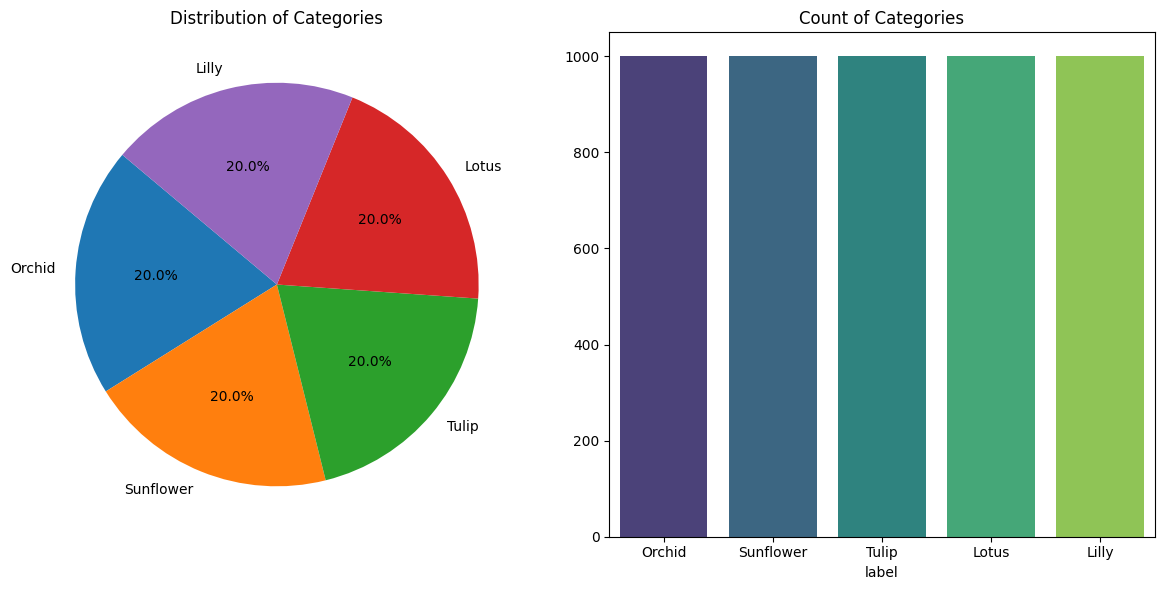

In [7]:
# Count the occurrences of each category in the 'category' column
count = df_train['label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Visualizing Training Images 

In [8]:
def visualize_images(path, num_images=5):
    # Get a list of image filenames in the specified path
    image_filenames = os.listdir(path)
    
    # Limit the number of images to visualize if there are more than num_images
    num_images = min(num_images, len(image_filenames))
    
    # Create a figure and axis object to display images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3),facecolor='white')
    
    # Iterate over the selected images and display them
    for i, image_filename in enumerate(image_filenames[:num_images]):
        # Load the image using Matplotlib
        image_path = os.path.join(path, image_filename)
        image = mpimg.imread(image_path)
        
        # Display the image
        axes[i].imshow(image)
        axes[i].axis('off')  # Turn off axis
        axes[i].set_title(image_filename)  # Set image filename as title
    
    # Adjust layout and display the figure
    plt.tight_layout()
    plt.show()

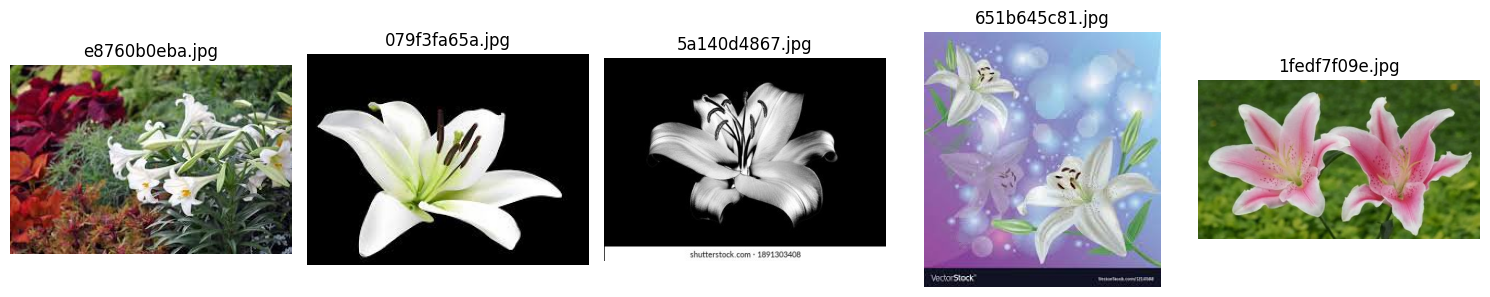

In [9]:
# Lilly Images 

# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/5-flower-types-classification-dataset/flower_images/Lilly"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

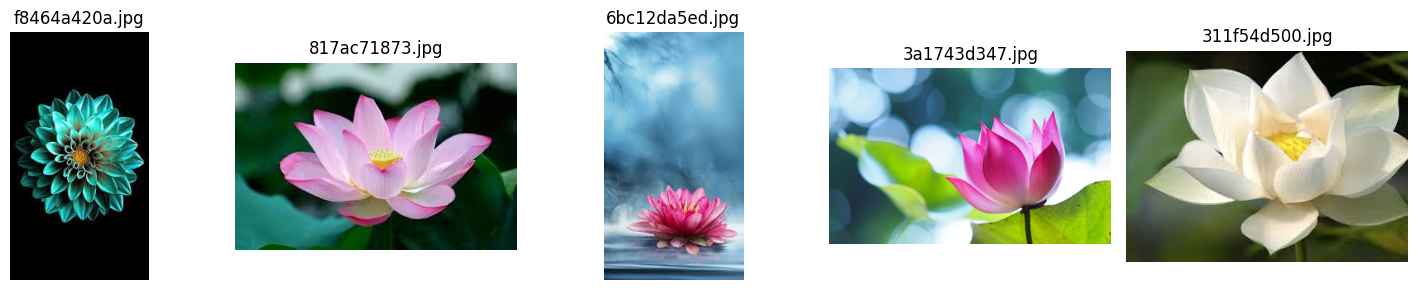

In [10]:
# Lotus Images 

# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/5-flower-types-classification-dataset/flower_images/Lotus"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

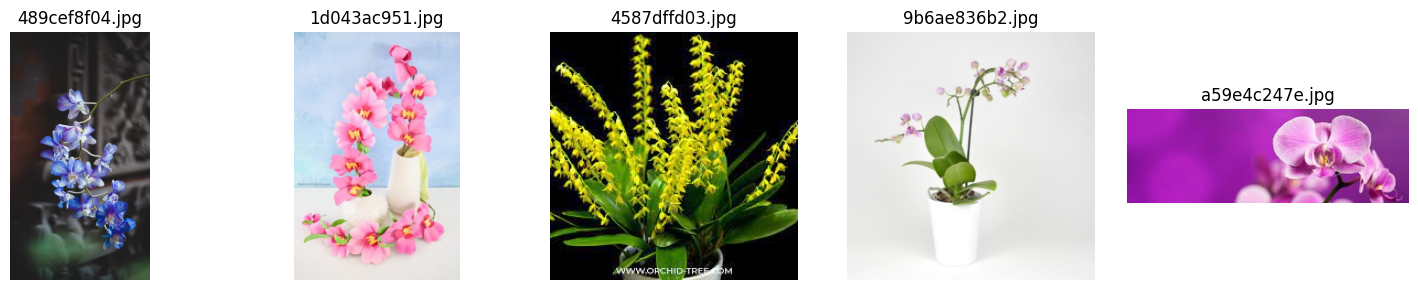

In [11]:
# Orchid Images 

# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/5-flower-types-classification-dataset/flower_images/Orchid"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

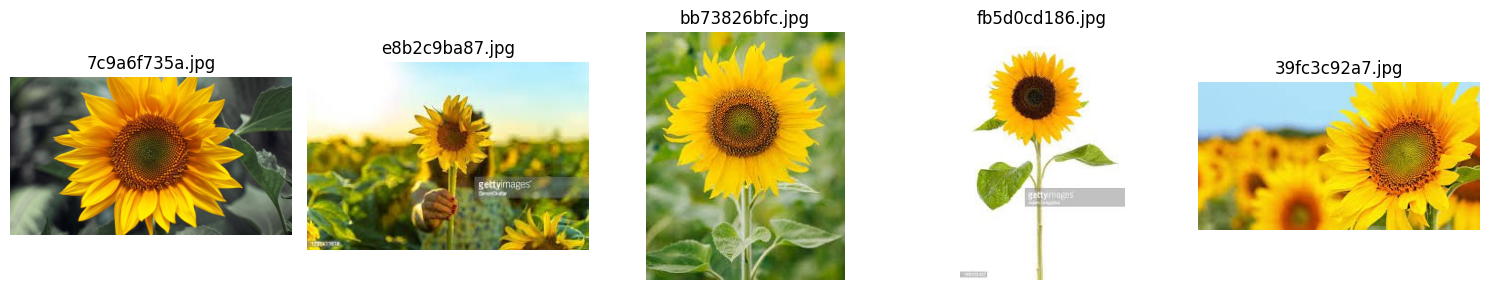

In [12]:
# Sunflower Images 

# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/5-flower-types-classification-dataset/flower_images/Sunflower"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

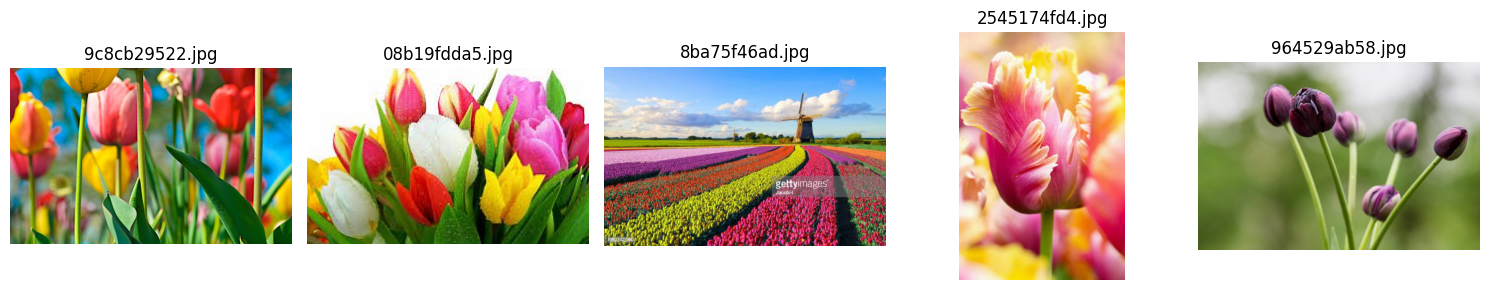

In [13]:
# Tulip Images 

# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/5-flower-types-classification-dataset/flower_images/Tulip"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

In [14]:
# Get the class indices assigned by the generators
class_indices_train = train_ds.class_indices

# Print the class indices
print("Class indices for Training Data:", class_indices_train)

Class indices for Training Data: {'Lilly': 0, 'Lotus': 1, 'Orchid': 2, 'Sunflower': 3, 'Tulip': 4}


### CNN Model Building and hyperTuning

In [15]:
def build_model(hp):
    model = models.Sequential()

    # First Conv Layer
    model.add(layers.Conv2D(
        filters=hp.Int('filters_1', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('kernel_size_1', values=[3, 5]),
        activation='relu',
        input_shape=(224, 224, 3),
        kernel_regularizer=regularizers.l2(hp.Float('l2_1', min_value=1e-5, max_value=1e-3, sampling='LOG'))
    ))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Second Conv Layer
    model.add(layers.Conv2D(
        filters=hp.Int('filters_2', min_value=64, max_value=256, step=64),
        kernel_size=hp.Choice('kernel_size_2', values=[3, 5]),
        activation='relu',
        kernel_regularizer=regularizers.l2(hp.Float('l2_2', min_value=1e-5, max_value=1e-3, sampling='LOG'))
    ))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Third Conv Layer (optional)
    if hp.Boolean('third_conv_layer'):
        model.add(layers.Conv2D(
            filters=hp.Int('filters_3', min_value=128, max_value=512, step=128),
            kernel_size=hp.Choice('kernel_size_3', values=[3, 5]),
            activation='relu',
            kernel_regularizer=regularizers.l2(hp.Float('l2_3', min_value=1e-5, max_value=1e-3, sampling='LOG'))
        ))
        model.add(layers.BatchNormalization())
        model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())

    # Dense layers
    model.add(layers.Dense(
        units=hp.Int('units', min_value=128, max_value=512, step=128),
        activation='relu',
        kernel_regularizer=regularizers.l2(hp.Float('l2_dense', min_value=1e-5, max_value=1e-3, sampling='LOG'))
    ))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(rate=hp.Float('dropout', min_value=0.3, max_value=0.6, step=0.1)))

    # Output layer
    model.add(layers.Dense(5, activation='softmax'))

    # Compile the model
    optimizer = Adam(
        hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
    )
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [16]:
from kerastuner.tuners import RandomSearch
from keras import layers, models, regularizers

# Set up the tuner for hyperparameter search
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='hyperparameter_search',
    project_name='improved_cnn_flower_classification'
)

In [17]:
# Search for the best hyperparameters
tuner.search(train_ds, validation_data=validation_ds, epochs=20)

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps.values}")

Trial 10 Complete [00h 07m 00s]
val_accuracy: 0.8019999861717224

Best val_accuracy So Far: 0.9139999747276306
Total elapsed time: 01h 15m 38s
Best Hyperparameters: {'filters_1': 32, 'kernel_size_1': 3, 'l2_1': 0.0005849060996052606, 'filters_2': 256, 'kernel_size_2': 5, 'l2_2': 0.0003651813846135204, 'third_conv_layer': True, 'units': 128, 'l2_dense': 0.00017580406699854202, 'dropout': 0.3, 'learning_rate': 0.0003437695226487248, 'filters_3': 512, 'kernel_size_3': 5, 'l2_3': 1.3791901033001647e-05}


### Model Compilation and Fitting 

In [24]:
best_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 107, 107, 256)  │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 107, 107, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 53, 53, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 49, 49, 512)    │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 49, 49, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 24, 24, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 294912)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    37,748,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,705,745 (471.90 MB)

 Trainable params: 41,234,629 (157.30 MB)

 Non-trainable params: 1,856 (7.25 KB)

 Optimizer params: 82,469,260 (314.60 MB)

In [18]:
# Build the model using the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

def lr_schedule(epoch):
    return best_hps.values['learning_rate'] * (0.1 ** (epoch // 10))

# Callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6),
    tf.keras.callbacks.LearningRateScheduler(lr_schedule)
]

# Train the model
history = best_model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=50,
    callbacks=callbacks
)



Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 31s 194ms/step - accuracy: 0.4446 - loss: 1.8169 - val_accuracy: 0.2380 - val_loss: 3.3532 - learning_rate: 3.4377e-04
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 24s 184ms/step - accuracy: 0.6300 - loss: 1.0777 - val_accuracy: 0.2680 - val_loss: 2.5010 - learning_rate: 3.4377e-04
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 24s 182ms/step - accuracy: 0.7159 - loss: 0.8565 - val_accuracy: 0.4680 - val_loss: 1.5970 - learning_rate: 3.4377e-04
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 180ms/step - accuracy: 0.8189 - loss: 0.6352 - val_accuracy: 0.5680 - val_loss: 1.4305 - learning_rate: 3.4377e-04
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 24s 182ms/step - accuracy: 0.8917 - loss: 0.4750 - val_accuracy: 0.7920 - val_loss: 0.7596 - learning_rate: 3.4377e-04
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 24s 181ms/step - accuracy: 0.9330 - loss: 0.3787 - val_accuracy: 0.7820 - val_loss: 0.7515 - learning_rate: 3.4377e-04
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 18

### Evaluating the Model 

In [19]:
# Evaluate the model on the validation dataset
validation_loss, validation_accuracy = best_model.evaluate(validation_ds)

# Print the validation loss and accuracy
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.8995 - loss: 0.4234
Validation Loss: 0.41758018732070923
Validation Accuracy: 0.9100000262260437


In [20]:
# Evaluate the model on the validation dataset
test_loss, test_accuracy = best_model.evaluate(test_ds)

# Print the validation loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 243ms/step - accuracy: 0.8850 - loss: 0.5578
Test Loss: 0.5726454257965088
Test Accuracy: 0.8880000114440918


### Plot Training and Validation Accuracy/Loss

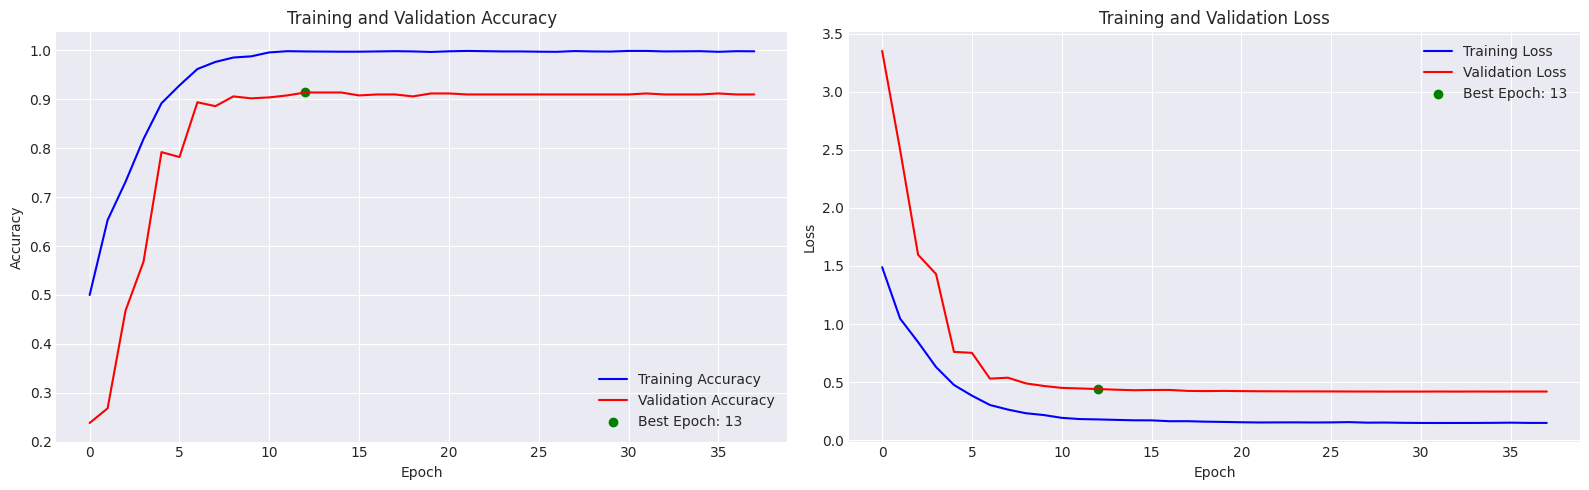

In [21]:
# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Set the background style
plt.style.use('seaborn-darkgrid')

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

### Model Predictions 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


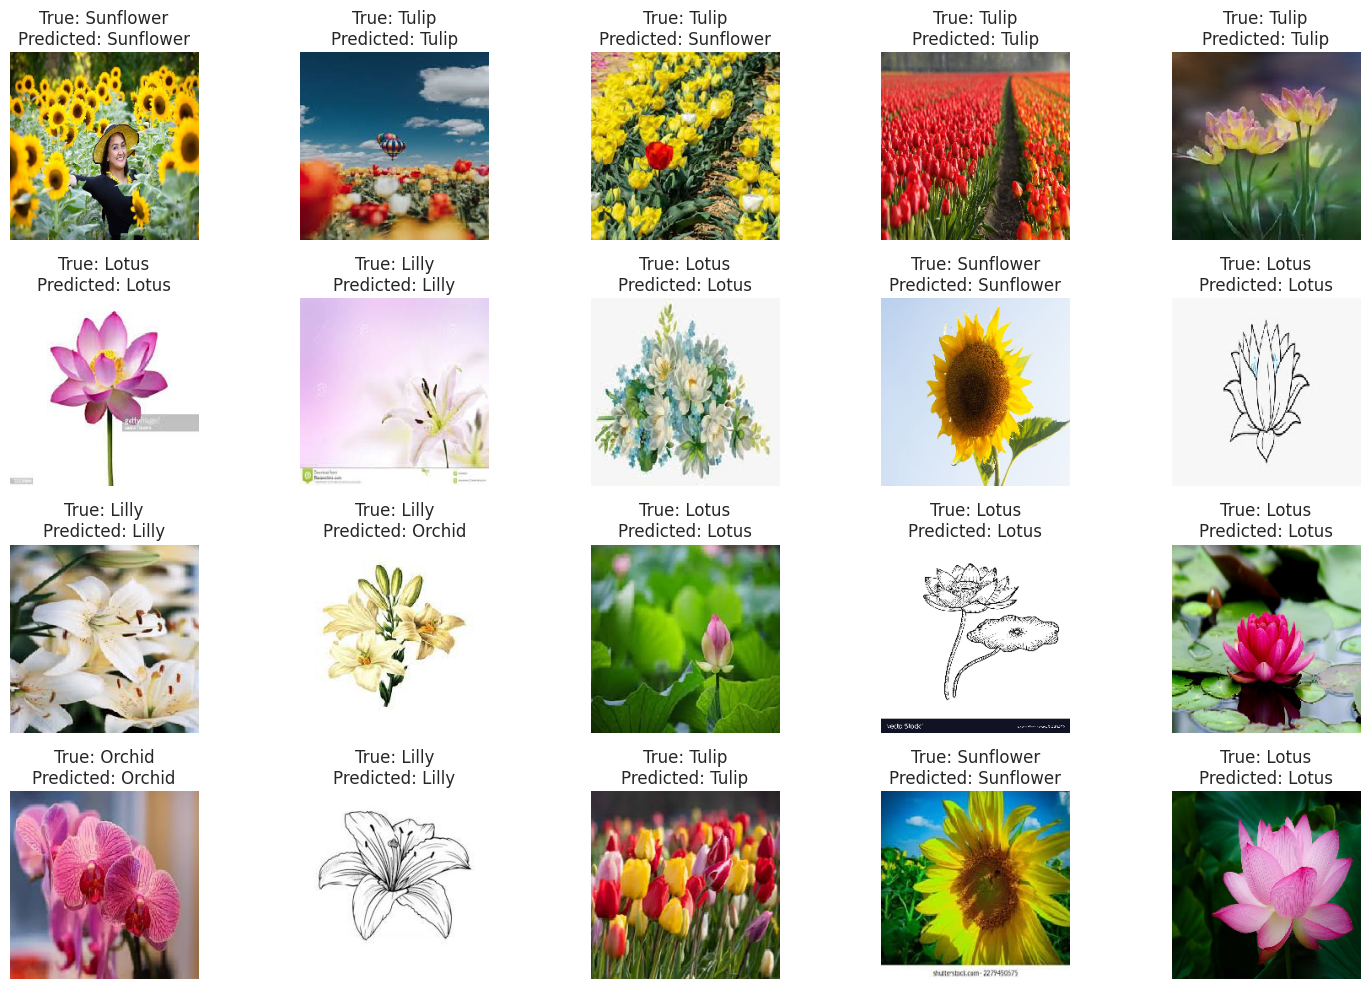

In [22]:
# Get the class labels
class_labels = list(test_ds.class_indices.keys())

# Predict on each image and plot results
num_images = 20
num_images_per_row = 5  # Set the number of images per row
num_rows = 4

plt.figure(figsize=(15, 10))
for i in range(num_images):
    image, label = next(test_ds)
    predictions = best_model.predict(image)
    
    # Iterate over each image in the batch
    for j in range(len(image)):
        if i * len(image) + j < num_images:  # Check if the total number of images exceeds the desired count
            predicted_class = class_labels[np.argmax(predictions[j])]
            true_class = class_labels[np.argmax(label[j])]
            
            plt.subplot(num_rows, num_images_per_row, i * len(image) + j + 1)
            plt.imshow(image[j])
            plt.title(f'True: {true_class}\nPredicted: {predicted_class}')
            plt.axis('off')

plt.tight_layout()
plt.show()

### Save the Best Model 

In [23]:
# Save the model
best_model.save('flower_classification_model.h5')